<a href="https://colab.research.google.com/github/RozitaAbdoli/credit_default_mining/blob/main/Brier_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brier Score:   
* Brier score is between 0-1 with zero being the best. 
* Calculates the MSE between the predicted probability and the probability of class=1 for each instance (which is either zero or 1).

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier
from sklearn import svm
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score, brier_score_loss

import time

from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [ ]:
#Load the dataset into pandas DataFrame
df = pd.read_csv("/content/drive/MyDrive/Capstone_project/v2_credit_default.csv")

In [ ]:
# get the dataset
def get_dataset():
	X, y = df.drop(['Default'], axis=1), df['Default']
	return X, y

# define the base models for the heterogenous ensemble
base_models = list()
base_models.append(('RF', RandomForestClassifier()))
# base_models.append(('AB', AdaBoostClassifier()))
base_models.append(('GB', GradientBoostingClassifier()))
base_models.append(('XGB', xgb.XGBClassifier()))
 
 
# get a list of models to evaluate
def get_models():
	models = dict()
	models['Logistic Regression'] = LogisticRegression(random_state=1, C= 50, penalty= 'l1', solver= 'liblinear')
	models['KNN'] = KNeighborsClassifier()
	models['Naive Bayes'] = GaussianNB()
	# models['SVM_RBF'] = svm.SVC(kernel ='rbf', probability=True)		##omitted because it was runtime prohibitive
	models['Decision Tree'] = DecisionTreeClassifier()
	models['Random Forest'] = RandomForestClassifier()
	models['AdaBoost'] = AdaBoostClassifier()
	models['GradientBoost'] = GradientBoostingClassifier()
	models['XGBoost'] = XGBClassifier()
	models['Heterogeneous_ensemble'] = VotingClassifier(estimators=base_models, voting='soft') 
	return models
	
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_brier_score', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>Logistic Regression -0.145 (0.002)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>KNN -0.186 (0.002)
>Naive Bayes -0.406 (0.017)
>Decision Tree -0.273 (0.008)
>Random Forest -0.139 (0.003)
>AdaBoost -0.244 (0.000)
>GradientBoost -0.134 (0.003)
>XGBoost -0.134 (0.003)
>Heterogeneous_ensemble -0.134 (0.003)


In [ ]:
#Change the global figure parameters for the plot below
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (25, 10),
         'axes.labelsize': 22,
         'axes.titlesize':22,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
pylab.rcParams.update(params)

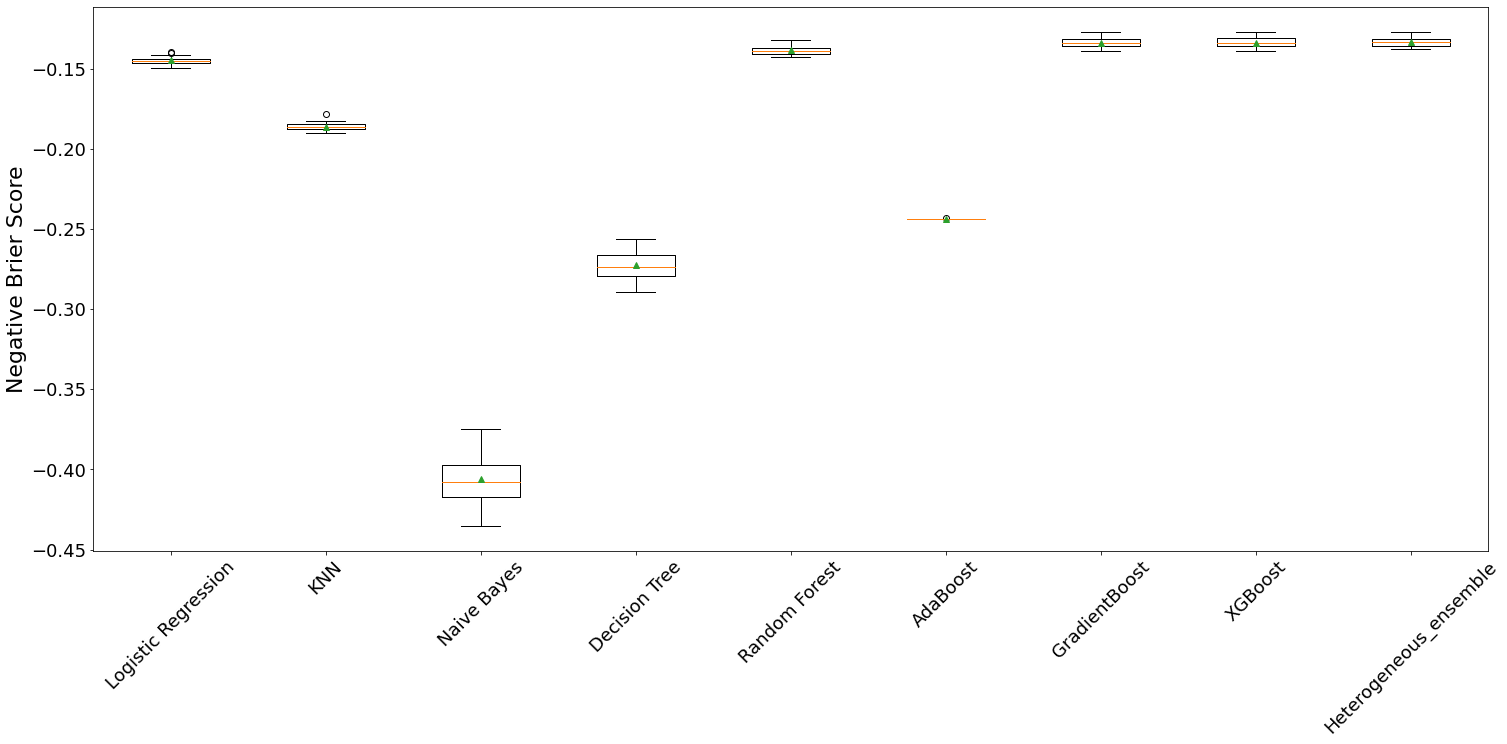

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.ylabel("Negative Brier Score")
pyplot.show()